In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import glob

In [2]:
def jagged_mean(arr):
    from copy import deepcopy
    arr = deepcopy(arr)
    m = []
    cnt = 0
    s = 0
    m_len = 0
    for a in arr:
        m_len = max(m_len, len(a))
    for _ in range(m_len):
        for a in arr:
            if len(a) > 0:
                cnt += 1
                s += a.pop(0)
        m.append(s/cnt)
        s=0
        cnt=0
    return m

In [15]:
filenames = glob.glob('../results/*separable_clue_hyperparameters*.json')[40:]

files = [open(name) for name in filenames]

jsons = np.reshape(np.array([json.load(f) for f in files]), (1, 5))
methods = jsons[0][0]['metadata']['generators'].keys()

C:\Users\drobi\anaconda3\envs\recourse2\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


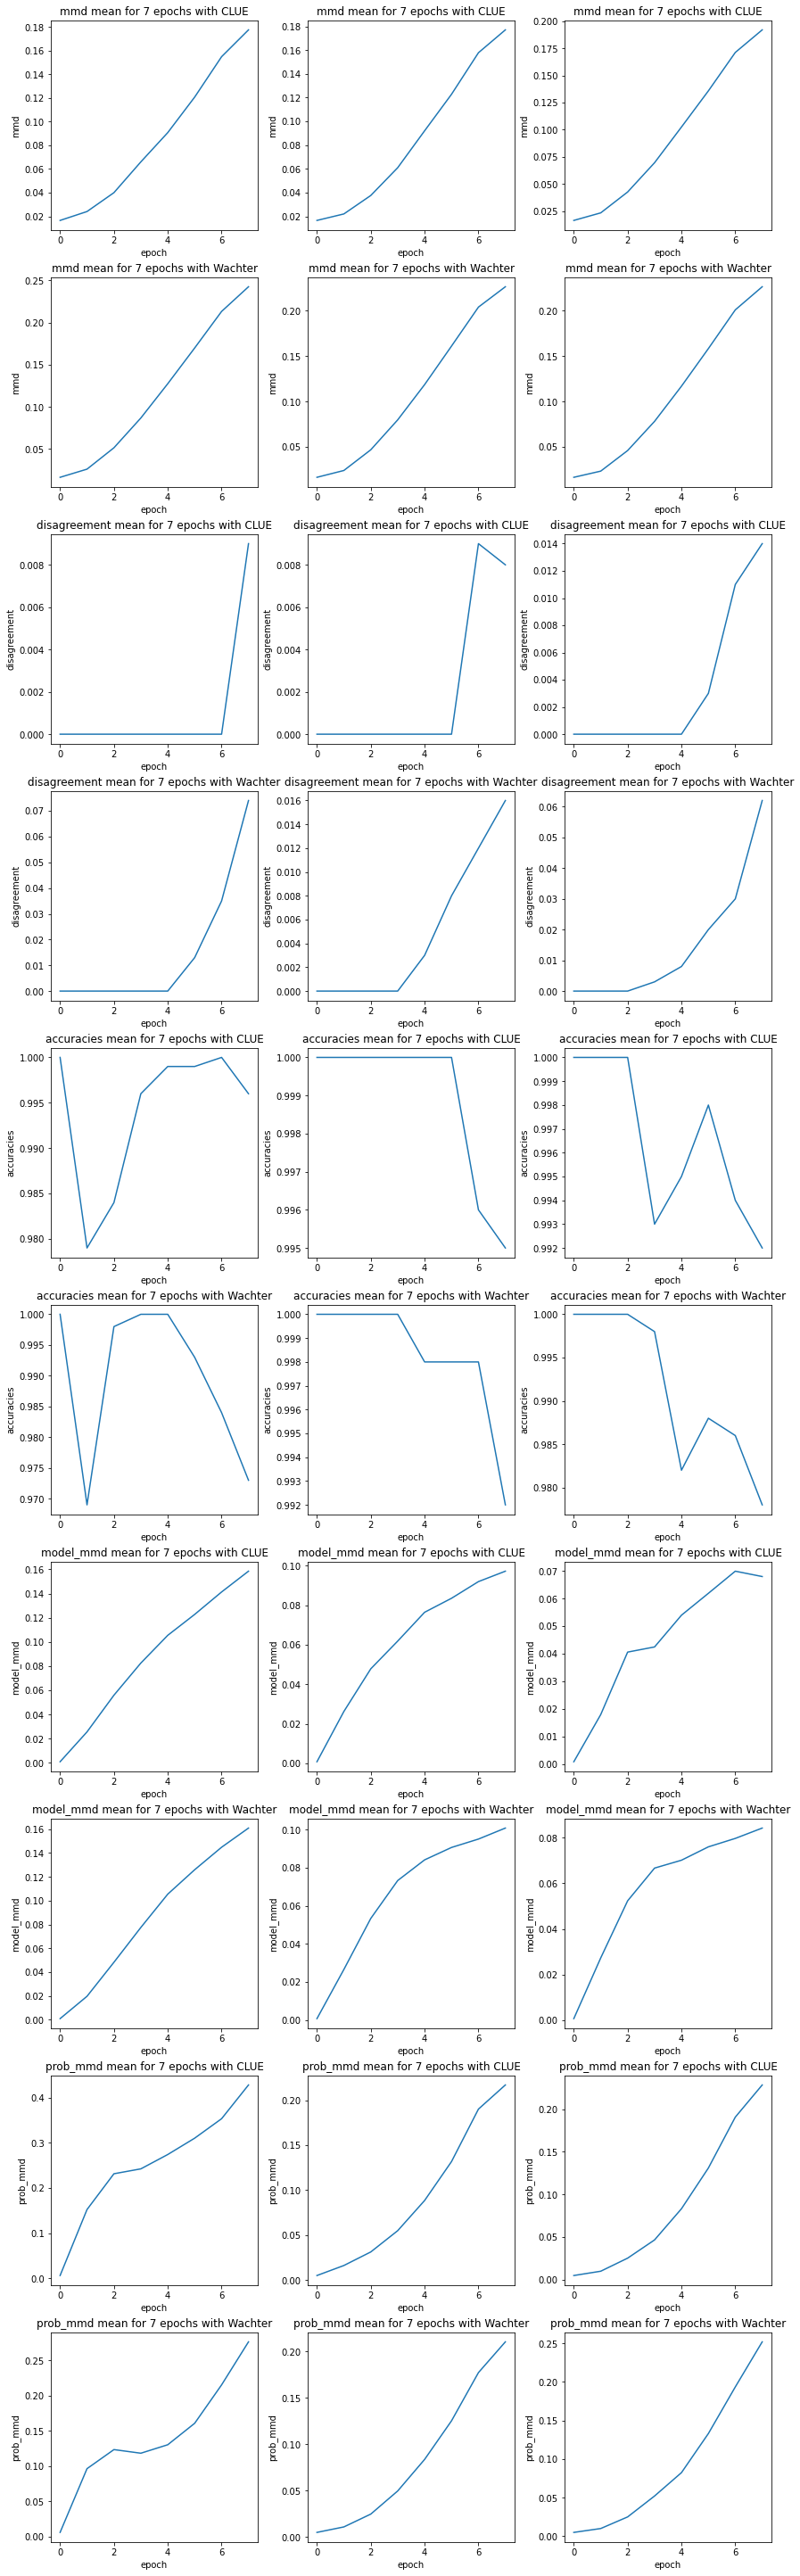

In [7]:
metrics = ['mmd', 'disagreement', 'accuracies', 'model_mmd', 'prob_mmd']
ncols = len(jsons)
nrows = len(metrics)*len(methods)

limits = {'mmd': (0, 0.16), 'disagreement': (0, 0.14), 'accuracies': (0.93, 1.01)}

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows),
                        constrained_layout=True)

for i, metric in enumerate(metrics):
    for j, method in enumerate(methods):
        for k, data in enumerate(jsons):
            ax = axs[len(methods) * i + j, k]
            raw = []
            for m_d in data:
                raw.append(m_d[method][metric])
            ax.plot(jagged_mean(raw))
#             ax.fill_between(range(len(m_d[method][metric])), np.min(raw, axis=0), np.max(raw, axis=0), facecolor='#f0f0f0')
            ax.set_title(f'{metric} mean for {len(m_d[method][metric]) - 1} epochs with {method}')
            ax.set_xlabel('epoch')
            ax.set_ylabel(metric)
#             if metric in limits:
#                 ax.set_ylim(limits[metric][0], limits[metric][1])

fig.show()
fig.savefig('images/results.png')

C:\Users\drobi\anaconda3\envs\recourse2\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


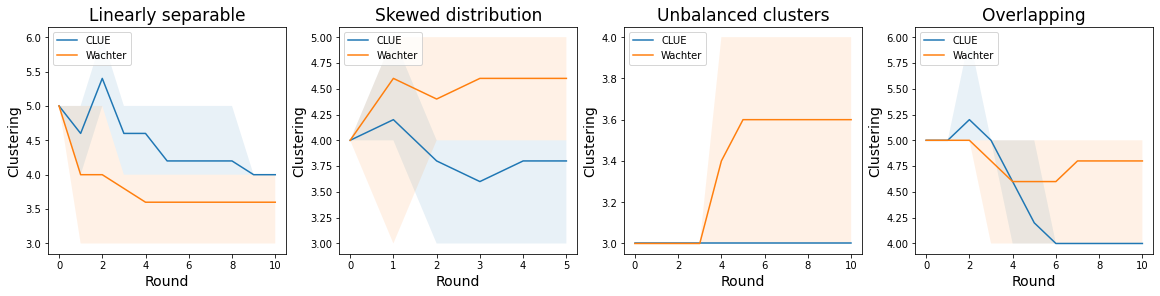

In [58]:
metrics = {
#     'mmd': 'MMD', 
#     'disagreement': 'Disagreement', 
#     'model_mmd': 'Model MMD'
    'clustering': 'Clustering'
}
ncols = 4
nrows = 1

datasets = ['linearly_separable', 'skewed_distribution', 'unbalanced_positive_clusters', 
             'overlapping']

limits = {'mmd': (0, 0.25), 'disagreement': (0, 0.14), 'model_mmd': (0, 0.18)}

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows),
                        constrained_layout=True)
ind = 0
for i, metric in enumerate(metrics):
    for j, method in enumerate(methods):
        for k, data in enumerate(jsons):
            name = method
#             ax = axs[int(k/3), k % 3]
            ax = axs[ind%ncols]
            raw = []
            for m_d in data:
                raw.append(m_d[method][metric])
            
            ds_name = m_d['metadata']['dataset'][12:-4]
            if ds_name not in datasets:
                continue
            ind+=1
            mean = jagged_mean(raw)
#             mean = np.interp(np.arange(0, len(mean) - 1, (len(mean) - 1)/100), np.arange(0, len(mean)), mean)
#             print(lin_int)
            ax.fill_between(range(len(m_d[method][metric])), np.min(raw, axis=0), np.max(raw, axis=0), alpha=.1)
            ax.plot(mean, label=name)
            ax.set_title(f"{ds_name.replace('_', ' ').capitalize().replace('positive ', '')}", size=17)
            ax.set_xlabel('Round', size=14)
            ax.set_ylabel(metrics[metric], size=14)
            ax.legend(loc=2)
#         if metric in limits:
#             ax.set_ylim(limits[metric][0], limits[metric][1])

fig.show()
fig.savefig('images/results_varying_datasets_kmeans.png')

C:\Users\drobi\anaconda3\envs\recourse2\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


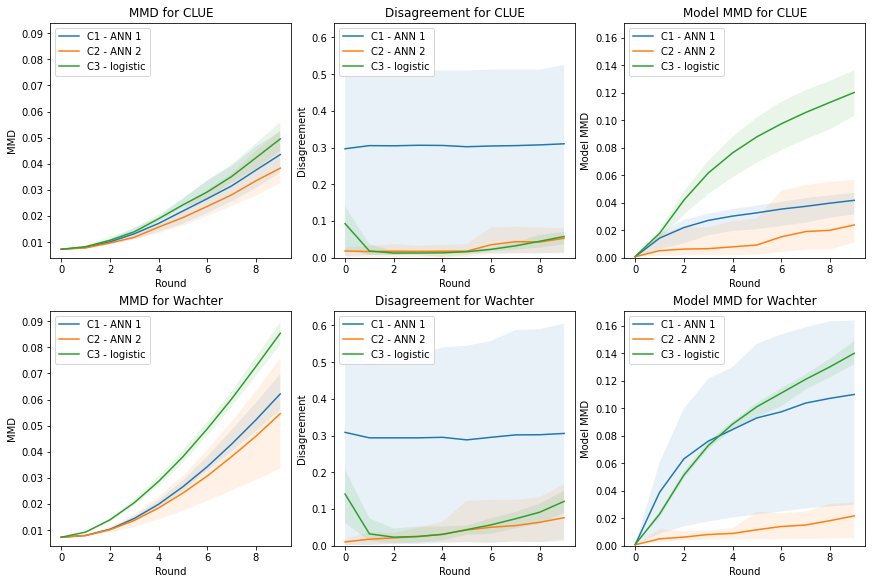

In [107]:
metrics = {'mmd': 'MMD', 'disagreement': 'Disagreement', 'model_mmd': 'Model MMD'}
ncols = len(metrics)
nrows = len(methods)

limits = {'mmd': (0.004, 0.094), 'disagreement': (0, 0.64), 'model_mmd': (0, 0.171)}

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows),
                        constrained_layout=True)

model_names = {'ann 1': 'C1 - ANN 1', 'ann 2': 'C2 - ANN 2', 'linear': 'C3 - logistic'}

for i, metric in enumerate(metrics):
    for j, method in enumerate(methods):
        for k, data in enumerate(jsons):
            name = data[0]['metadata']['model']['model_type']
            if name == 'ann':
                name = f"{name} {len(data[0]['metadata']['model']['hyperparameters']['hidden_size'])}"
            ax = axs[j, i]
            raw = []
            for m_d in data:
                raw.append(m_d[method][metric][:10])
            mean = jagged_mean(raw)
#             mean = np.interp(np.arange(0, len(mean) - 1, (len(mean) - 1)/100), np.arange(0, len(mean)), mean)
#             print(lin_int)
            ax.fill_between(range(len(m_d[method][metric][:10])), np.min(raw, axis=0), np.max(raw, axis=0), alpha=.1)
            ax.plot(mean, label=model_names[name])
        ax.set_title(f'{metrics[metric]} for {method}')
        ax.set_xlabel('Round')
        ax.set_ylabel(metrics[metric])
        handles, labels = ax.get_legend_handles_labels()
        # sort both labels and handles by labels
#         labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
        ax.legend(handles, labels, loc=2)
        if metric in limits:
            ax.set_ylim(limits[metric][0], limits[metric][1])

fig.show()
fig.savefig('images/results_varying_models.png')

In [16]:
metrics = ['mmd', 'disagreement', 'model_mmd', 'mmd_p_value', 'cf_pred_data']
ncols = len(metrics)
nrows = len(methods)

results = {}

for i, data in enumerate(jsons):
    methods = data[0]['metadata']['generators'].keys()
    results[i] = {}
    for method in methods:
        results[i][method] = {}
        for metric in metrics:        
            results[i][method][metric] = {}
            raw = []
            for m_d in data:
                if metric == 'cf_pred_data':
                    raw.extend(np.array(m_d[method][metric][:10]).flatten())
                else:
                    raw.append(m_d[method][metric][:10][-1])
            results[i][method][metric]['mean'] = np.mean(raw)
            results[i][method][metric]['std'] = np.std(raw)
                
        for m_d in data:
            succ_rate = 0
            ynn = []
            dist = []
            for j in range(len(m_d[method]['benchmark'][:10])):
                b_df = pd.read_json(m_d[method]['benchmark'][j])
                succ_rate += b_df['Success_Rate'].loc[0]
                ynn.append(b_df['y-Nearest-Neighbours'].loc[0])
                
                for n in b_df['Distance_3']:
                    dist.append(np.sqrt(n))

            succ_rate /= len(m_d[method]['benchmark'])
        results[i][method]['succ_rate'] = succ_rate
        results[i][method]['yNN'] = {}
        results[i][method]['yNN']['mean'] = np.mean(ynn)
        results[i][method]['yNN']['std'] = np.std(ynn)
        results[i][method]['distance'] = {}
        results[i][method]['distance']['mean'] = np.mean(dist)
        results[i][method]['distance']['std'] = np.std(dist)
    results[i]['metadata'] = data[0]['metadata']
            
results

{0: {'Wachter': {'mmd': {'mean': 0.12146295585888826,
    'std': 0.00011100513648933941},
   'disagreement': {'mean': 0.0645, 'std': 0.0010000000000000009},
   'model_mmd': {'mean': 0.1460335440938492, 'std': 0.0038805728784245376},
   'mmd_p_value': {'mean': 0.0, 'std': 0.0},
   'cf_pred_data': {'mean': 0.5061125779151916, 'std': 0.0026164605375398843},
   'succ_rate': 1.0,
   'yNN': {'mean': 0.93, 'std': 0.19702791680368548},
   'distance': {'mean': 0.20556611580172887, 'std': 0.09590414650154706}},
  'metadata': {'iterations': 10,
   'samples': 10,
   'generators': {'Wachter': {'class': 'Wachter',
     'hyperparameters': {'data_name': 'custom',
      'loss_type': 'BCE',
      't_max_min': 0.05}}},
   'model': {'model_type': 'linear',
    'hyperparameters': {'lr': 0.005, 'epochs': 4, 'batch_size': 2}},
   'dataset': '../datasets/linearly_separable.csv',
   'np_seed': 1}}}